## Exploratory Data Analysis

In [2]:
# import libraries
import ast
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datasets import load_dataset

# loading data
df = pd.read_csv("/Users/maxwellpearse/Library/Mobile Documents/com~apple~CloudDocs/Life/b.Business, Money, Education,  Employment/Python/data_jobs.csv")

# cleaning data
df["job_posted_date"] = pd.to_datetime(df.job_posted_date)
df["job_skills"] = df["job_skills"].apply(lambda skill_list: ast.literal_eval(skill_list) if pd.notna(skill_list) else skill_list)

In [3]:
# Only get Data Analyst jobs in the US
df_DA_US = df[(df["job_title_short"] == "Data Analyst") & (df["job_country"] == "United States")].copy()

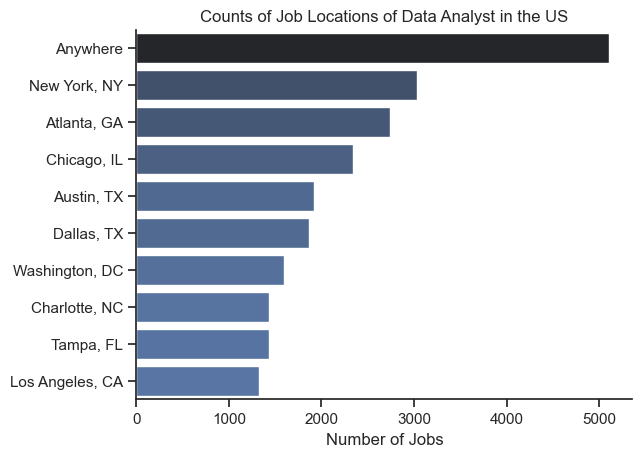

In [4]:
df_plot = df_DA_US["job_location"].value_counts().head(10).to_frame() #same as groupby and aggregation as size

sns.set_theme(style="ticks")
sns.barplot(data=df_plot, x="count", y="job_location", hue="count", palette="dark:b_r", legend=False)
sns.despine()
plt.title("Counts of Job Locations of Data Analyst in the US")
plt.xlabel("Number of Jobs")
plt.ylabel("")
plt.show()

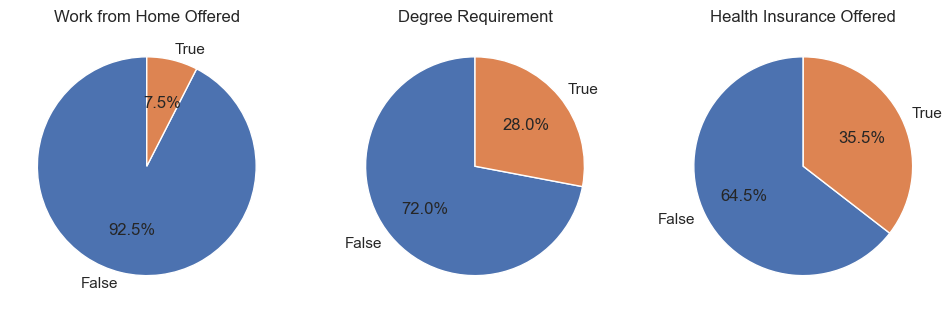

In [5]:
fig, ax = plt.subplots(1,3)
fig.set_size_inches(12,5)

dict_column = {
    "job_work_from_home": "Work from Home Offered", 
    "job_no_degree_mention": "Degree Requirement", 
    "job_health_insurance": "Health Insurance Offered"
}

for i, (column, title) in enumerate(dict_column.items()):
    ax[i].pie(df_DA_US[column].value_counts(), startangle = 90, autopct = "%1.1f%%", labels=["False", "True"])
    ax[i].set_title(title)


plt.show()

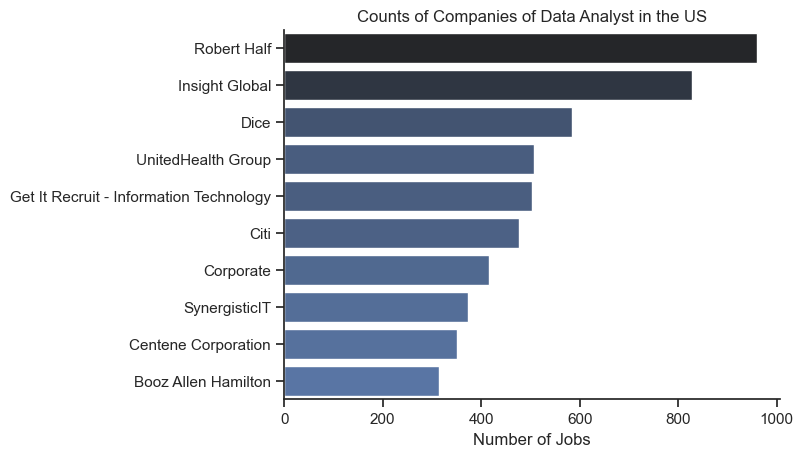

In [6]:
df_plot = df_DA_US["company_name"].value_counts().head(10).to_frame() #same as groupby is use aggregation size

sns.set_theme(style="ticks")
sns.barplot(data=df_plot, x="count", y="company_name", hue="count", palette="dark:b_r", legend=False)
sns.despine()
plt.title("Counts of Companies of Data Analyst in the US")
plt.xlabel("Number of Jobs")
plt.ylabel("")
plt.show()